<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [9]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Data exploration

#### Tabular exploration

In [10]:
#Cargar datos
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/MINDD/train.csv')
#df = pd.read_csv("/content/drive/MyDrive/train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

In [ ]:
df.info()

Vemos que no tiene valores nulos en ninguna de las columnas

In [ ]:
df.drop_duplicates()

El dataset no contenia duplicados.

In [ ]:
# Tassio
#check null values
df.isnull().sum(axis = 0)

No null values

In [ ]:
# shape
print(df.shape)
# describe
print(df.describe())

#### Graphics explorarion

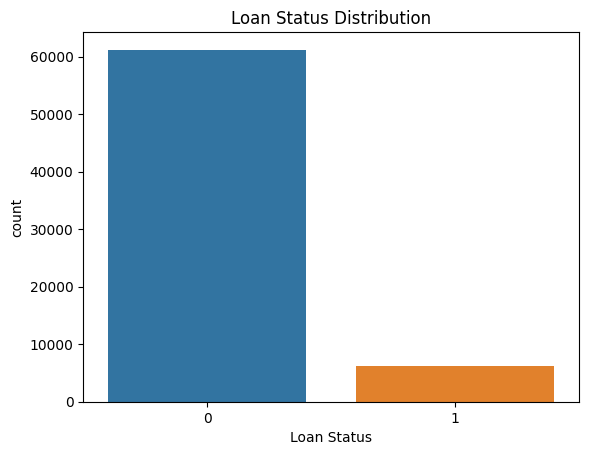

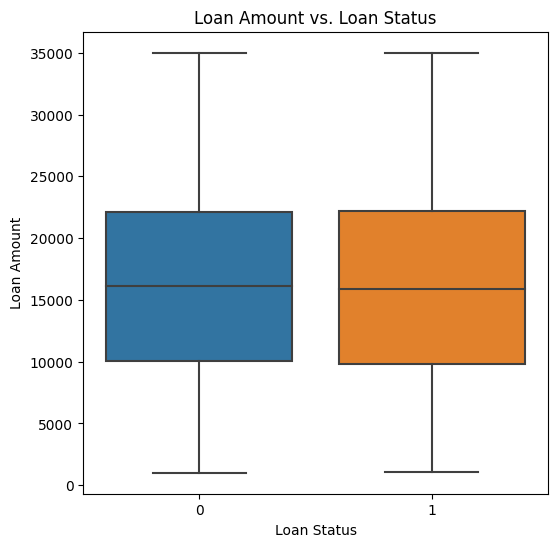

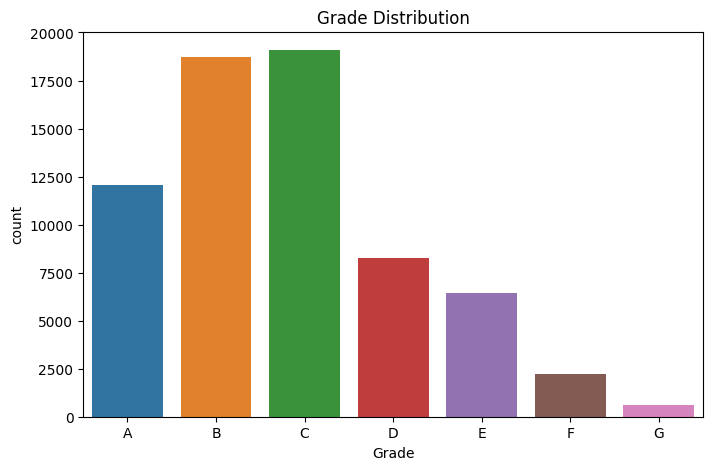

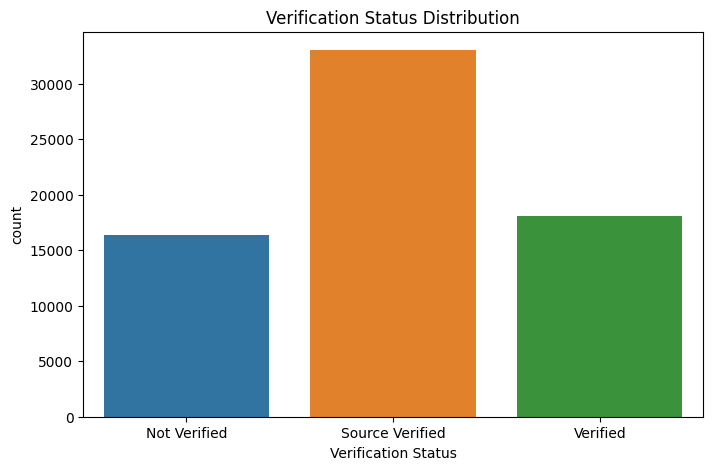

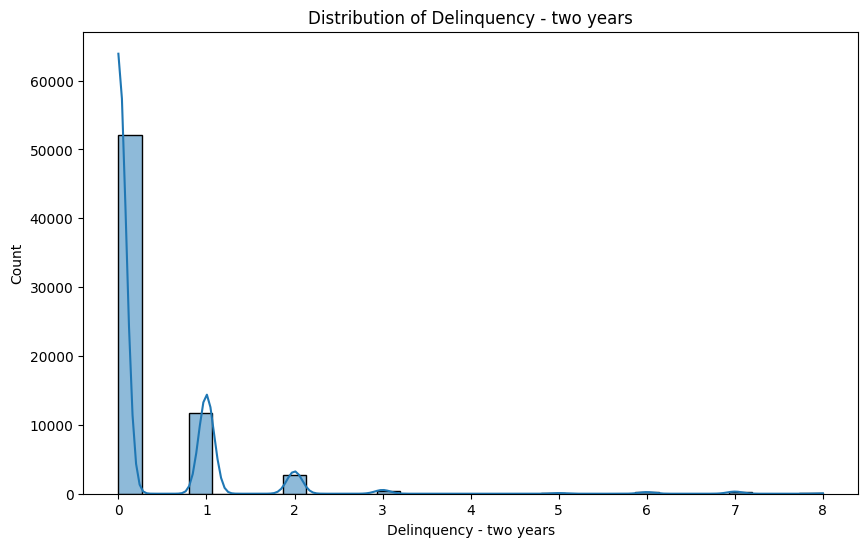

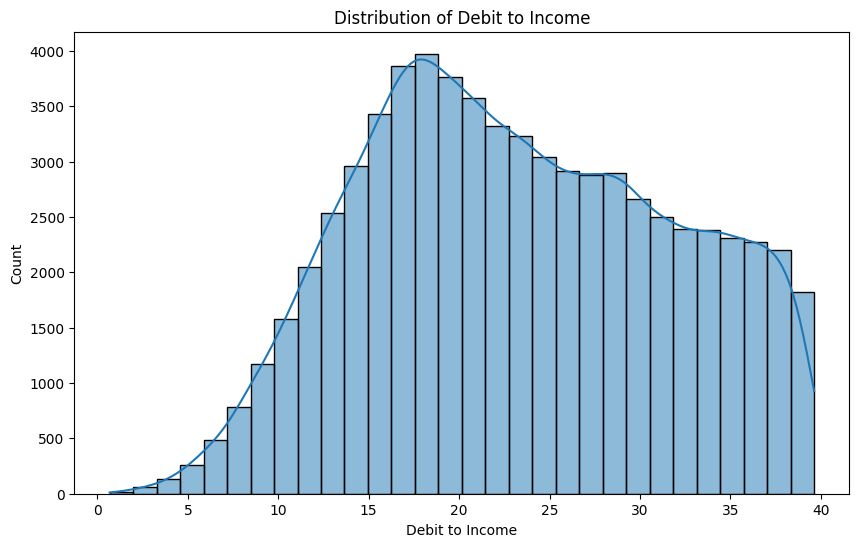

In [ ]:
# Visualize the distribution of Loan Status
sns.countplot(x='Loan Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(6, 6))
sns.boxplot(x='Loan Status', y='Loan Amount', data=df)
plt.title('Loan Amount vs. Loan Status')
plt.show()

# Countplot for Grade
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', data=df, order=sorted(df['Grade'].unique()))
plt.title('Grade Distribution')
plt.show()

# Countplot for Verification Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Verification Status', data=df)
plt.title('Verification Status Distribution')
plt.show()

# Histogram for Delinquency - two years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delinquency - two years', bins=30, kde=True)
plt.title('Distribution of Delinquency - two years')
plt.xlabel('Delinquency - two years')
plt.show()

# Histogram for Debit to Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Debit to Income', bins=30, kde=True)
plt.title('Distribution of Debit to Income')
plt.xlabel('Debit to Income')
plt.show()

<Axes: title={'center': 'Delinquency - two years'}, xlabel='[Loan Status]'>

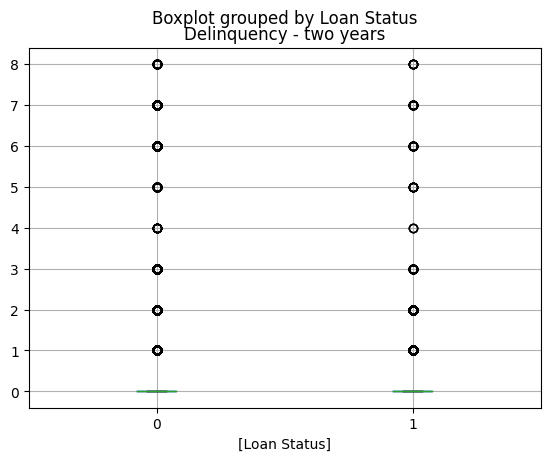

In [ ]:
df.boxplot(column=['Delinquency - two years'], by=['Loan Status'])

#Data pre processing


##### Anova

In [30]:
from scipy.stats import f_oneway, chi2_contingency

# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA
selected_features_anova = []

# Perform ANOVA for numerical attributes
for column in numerical_attributes.columns:
    p_value = f_oneway(df[df['Loan Status'] == 1][column], df[df['Loan Status'] == 0][column]).pvalue
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        selected_features_anova.append(column)

# Print the selected features for ANOVA
print("Selected features based on ANOVA:")
print(selected_features_anova)

# ANOVA results
anova_results = {}
for column in selected_features_anova:
    anova_result = f_oneway(df[df['Loan Status'] == 1][column], df[df['Loan Status'] == 0][column])
    anova_results[column] = anova_result.pvalue

# Print ANOVA results
print("ANOVA p-values for numerical attributes:")
print(anova_results)


Selected features based on ANOVA:
['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
ANOVA p-values for numerical attributes:
{'Delinquency - two years': 0.009462634922992178, 'Public Record': 0.005946386493849328, 'Total Received Late Fee': 0.014999219404735661, 'Total Collection Amount': 0.04037045067395023, 'Total Current Balance': 0.010689900265710124, 'Loan Status': 0.0}


##### chi-square

In [32]:
# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA and Chi-Square
selected_features_chi2 = []

# Perform Chi-Square test for categorical attributes
for column in categorical_attributes.columns:
    contingency_table = pd.crosstab(df[column], df['Loan Status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        selected_features_chi2.append(column)

# 2. Chi-Square for categorical attributes
chi2_results = {}
for column in selected_features_chi2:
    contingency_table = pd.crosstab(df[column], df['Loan Status'])
    chi2_result = chi2_contingency(contingency_table)
    chi2_results[column] = chi2_result[1]

# Print Chi-Square results
print("\nChi-Square p-values for categorical attributes:")
print(chi2_results)



print("\nSelected features based on Chi-Square:")
print(selected_features_chi2)


Chi-Square p-values for categorical attributes:
{'Grade': 0.0293605144624493, 'Employment Duration': 0.000318849414713897, 'Initial List Status': 0.0005038281525924869}

Selected features based on Chi-Square:
['Grade', 'Employment Duration', 'Initial List Status']


#####  Autocorrelation

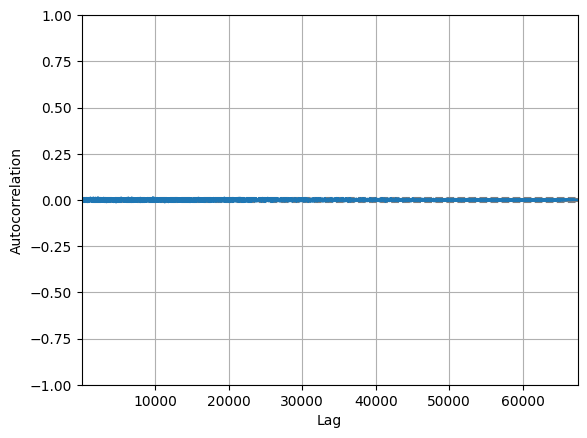

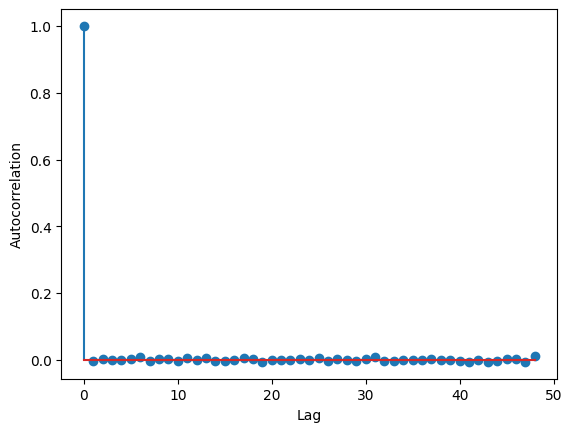

In [35]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Loan Status'])
plt.show()

from statsmodels.tsa.stattools import acf

# Calcula a autocorrelação para diferentes lags
autocorrelation_values = acf(df['Loan Status'])

# Plota a autocorrelação
plt.stem(autocorrelation_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

